In [18]:
from pandas import Series, date_range
import pandas as pd
from sodapy import Socrata
#from keys import api_key
from matplotlib import pyplot as plt
import numpy as np
import scipy.stats as stats
import scipy
from scipy.stats import linregress
from matplotlib.pyplot import figure
import scipy.stats as st

## Plots

### Hypothesis Two: Average Pedestrian activity increased after the first lockdown, but not to pre-pandemic levels (average of August 2019 to February 2020).


#### Bar chart: Pedestrian count per month in year 2019, 2020, 2021

In [19]:
df=pd.read_csv('df.csv')
df3_employed=pd.read_csv('df3_employed.csv')

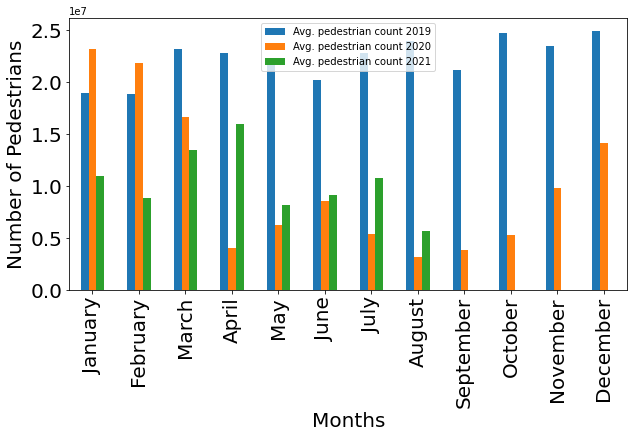

In [20]:
#Bar chart
b1=df.plot(x="month",kind="bar",figsize=[10,5],fontsize=20)#, stacked=True
fig = b1.get_figure()
b1.set_xlabel("Months",fontsize=20)
b1.set_ylabel("Number of Pedestrians",fontsize=20)
b1.legend(['Avg. pedestrian count 2019','Avg. pedestrian count 2020','Avg. pedestrian count 2021'])
#b1.title("Pedestrian count per month in year 2019, 2020, 2021")
#Bar chart.legend(["Pedestrian Counts 2019", "Pedestrian Counts 2020","Pedestrian Counts 2021"],fontsize=20)
fig.savefig('2019_2020_2021Bar.png', bbox_inches='tight')

In [21]:
df

,month,day_based_counts2019,day_based_counts2020,day_based_counts2021
0,January,18904686.0,23189121.0,10904769.0
1,February,18816254.0,21853368.0,8775020.0
2,March,23181242.0,16576373.0,13412576.0
3,April,22818120.0,3965628.0,15917378.0
4,May,21590920.0,6257626.0,8189692.0
5,June,20194222.0,8573779.0,9123174.0
6,July,22744685.0,5394964.0,10791452.0
7,August,23896524.0,3157701.0,5678484.0
8,September,21107792.0,3789356.0,0.0
9,October,24738547.0,5274979.0,0.0


#### Statistical Analysis: p-value to confirm significance of change of Average pedestrian count pre and post Lockdown

In [22]:
stat,pvalEmployment=stats.ttest_ind(df["day_based_counts2020"], df["day_based_counts2019"], equal_var=False)
if pvalEmployment < 0.05:
    print("Reject the Null hypothesis- There is a significant change in both categories with p-value",\
          round(pvalEmployment,4))
else:
    print("Null Hypothesis: No change in pedestrian acitvity pre or post lockdown")

Reject the Null hypothesis- There is a significant change in both categories with p-value 0.0001


In [23]:
stat

-5.6278877369198

In [24]:
#find T critical value
critical_value = stats.chi2.ppf(q = 0.95, df = 1)
critical_value

3.841458820694124

#### Data clipped for comparison from January to August (2019,2020,2021*)

Because 2021 data on pedestrian acitivty is only avaibale upto August, thus for a relative comparison, only these months are used

In [25]:
# Relationship from scatter plot
df1=df.loc[df["month"].isin(["January","February","March","April","May","June","July","August"])]
df1.describe().T
df1


,month,day_based_counts2019,day_based_counts2020,day_based_counts2021
0,January,18904686.0,23189121.0,10904769.0
1,February,18816254.0,21853368.0,8775020.0
2,March,23181242.0,16576373.0,13412576.0
3,April,22818120.0,3965628.0,15917378.0
4,May,21590920.0,6257626.0,8189692.0
5,June,20194222.0,8573779.0,9123174.0
6,July,22744685.0,5394964.0,10791452.0
7,August,23896524.0,3157701.0,5678484.0


#### Scatter plot to analyse relation between lockdown (year 2020) and prelockdown (2019)

You can see that there is a negative linear relation between the points.

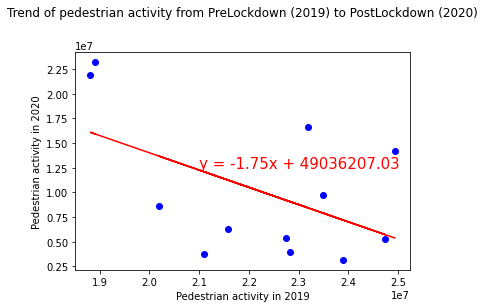

In [26]:

x_values=df['day_based_counts2019']
y_values=df['day_based_counts2020']
(slope, intercept, rvalue, pvalue, stderr) =linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color="blue")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(2.1e7,1.25e7),fontsize=15,color="red")
plt.xlabel('Pedestrian activity in 2019')
plt.ylabel('Pedestrian activity in 2020')
plt.title("Trend of pedestrian activity from PreLockdown (2019) to PostLockdown (2020)\n\n")
plt.savefig('Scatterplot for relation between pedestrian activity yr 19 and 20.png')
plt.show()


### Line Graph for pedestrian count across month January-August for 2019, 2020, 2021*

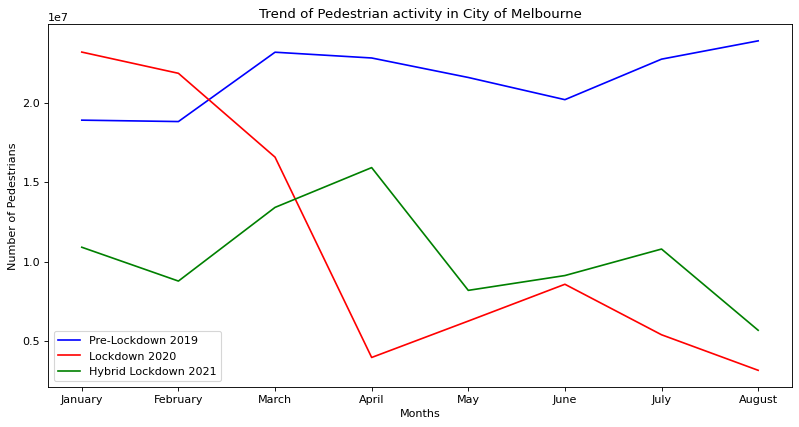

In [27]:
#Line chart

figure(figsize=(12, 6), dpi=80)
ped_avg2019,=plt.plot(df1["month"],df1['day_based_counts2019'], color="blue", label="Pre-Lockdown 2019")
ped_avg2020,=plt.plot(df1["month"],df1['day_based_counts2020'], color="red", label="Lockdown 2020")
ped_avg2021,=plt.plot(df1["month"],df1['day_based_counts2021'], color="green", label="Hybrid Lockdown 2021")

plt.title("Trend of Pedestrian activity in City of Melbourne")
plt.ylabel("Number of Pedestrians")
plt.xlabel("Months")

plt.legend(handles=[ped_avg2019, ped_avg2020,ped_avg2021], loc="best")
plt.savefig('Line plot Trend of Pedestrian acitvity pre post covid.png')

### Hypothesis Five: Pedestrian activity increases as the number of Victorian full-time workers increases.

In [28]:
df3_employed

,month,day_based_counts2019,day_based_counts2020,day_based_counts2021,Person Employed 2019,Person Employed 2020,Person Employed 2020.1
0,January,18904686.0,23189121.0,10904769.0,3359.5,3443.0,3389.2
1,February,18816254.0,21853368.0,8775020.0,3367.4,3427.9,3409.2
2,March,23181242.0,16576373.0,13412576.0,3376.9,3439.9,3415.9
3,April,22818120.0,3965628.0,15917378.0,3368.1,3313.0,3420.0
4,May,21590920.0,6257626.0,8189692.0,3395.9,3244.6,3450.8
5,June,20194222.0,8573779.0,9123174.0,3392.9,3272.7,3441.5
6,July,22744685.0,5394964.0,10791452.0,3393.2,3285.6,3460.2
7,August,23896524.0,3157701.0,5678484.0,3417.6,3248.5,3489.3
8,September,21107792.0,3789356.0,0.0,3427.2,3201.3,NaN
9,October,24738547.0,5274979.0,0.0,3431.9,3281.2,NaN


#### Relationship analysis with the help of scatter plot: Average Pedestrian Count vs. Full time employment

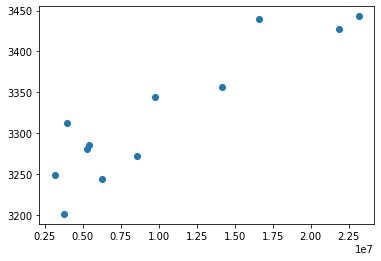

In [29]:
plt.scatter(df3_employed["day_based_counts2020"],df3_employed["Person Employed 2020"])

In [30]:
x_val=df3_employed["day_based_counts2020"]
y_val=df3_employed["Person Employed 2020"]

#### Plotting the relationship estimated model.

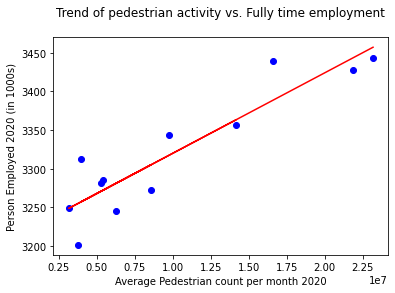

In [40]:
(slope2, intercept2, rvalue2, pvalue2, stderr2) =linregress(x_val*1000, y_val)
regress_values2 = x_val*1000 * slope2 + intercept2
line_eq2 = f"y = " + str(round(slope2,4)) + "x + " + "{:.2e}".format(round(intercept2,2))
plt.scatter(x_val,y_val, color="blue")
plt.plot(x_val,regress_values2,"r-")
#plt.annotate(line_eq2,(1.1e7,2.25e6),fontsize=15,color="red")
#plt.annotate(line_eq2,(1.1e7,3300),fontsize=15,color="red")#,(1.1e7,2.25e6)
plt.xlabel('Average Pedestrian count per month 2020')
plt.ylabel('Person Employed 2020 (in 1000s)')
plt.title("Trend of pedestrian activity vs. Fully time employment\n")
plt.savefig('Relation Pedestrian vs. Employment.png')
plt.savefig("Pedestrian Count vs. Full time employment.png")
plt.show()


#### Statistical Analysis with t-test

In [41]:
df3_employed["day_based_counts2020"].corr(df3_employed["Person Employed 2020"])

0.9097066344892829

In [42]:
corr2=st.pearsonr(x_val,y_val)
print(f'The correlation between full time employment and pedestrian count is {round(corr2[0],2)} with p-value {round(pvalue2,4)}')

The correlation between full time employment and pedestrian count is 0.91 with p-value 0.0
